

<h1 align="center">
    NSDC - HerWILL Data Science Contest
</h1>
  
<h2 align="center">
    Project: Fake News Detection
</h2>

<h3 align="center">
    Name: Lubaba Hasan
</h3>


### **Please Read Before You Begin Your Project**

---



**Instructions: Google Colab Notebooks:**

Google Colab is a free cloud service. It is a hosted Jupyter notebook service that requires no setup to use, while providing free access to computing resources. We will be using Google Colab for this project.

In order to work within the Google Colab Notebook, **please start by clicking on "File" and then "Save a copy in Drive."** This will save a copy of the notebook in your personal Google Drive.

Please rename the file to "DS Contest - Fake News Detection - Your Full Name."

 **Please note that this contest must be done INDIVIDUALLY, submitting in teams will result in disqualification.**

You can now start working on the project. :)

For reference, you can see the code we followed for our sentiment analysis workshop, this might be a good example to have if you want some help:
Link https://github.com/raima2001/HerWILL-NSDC-Workshop-Content

**Project Description:**

This project will introduce students to an array of skills as they strive to create a fake news detection model to classify a given news article as real or fake. Fake News Detection leverages both Natural Language Processing and Machine Learning skills - how to represent text in a machine-understandable format so as to classify the text and extract whether a news is fake or real. We will also cover visualizations and how to deploy models in the real world.

**Dataset**

This is the link to the dataset for the contest:
https://raw.githubusercontent.com/raima2001/HerWILL-NSDC-DS-Contest/main/news_dataset_subset%20(1).csv

Task 1: Import all the necessary libraries

In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from nltk.tokenize import word_tokenize, sent_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.preprocessing import LabelBinarizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score

Task 2: Now read the dataset using Pandas (Marks: 1)

In [ ]:
url = 'https://raw.githubusercontent.com/raima2001/HerWILL-NSDC-DS-Contest/main/news_dataset_subset%20(1).csv'

In [ ]:
data = pd.read_csv(url)

Task 3: Let's see what the data looks like. We can use the `head` function which returns the first 5 rows of the dataframe. (Marks: 1)

In [ ]:
data.head()

,text,word_label
0,No comment is expected from Barack Obama Membe...,real
1,Did they post their votes for Hillary already?,real
2,"Now, most of the demonstrators gathered last ...",real
3,A dozen politically active pastors came here f...,fake
4,"The RS-28 Sarmat missile, dubbed Satan 2, will...",real



Task 4: Use the `describe()` function which gives us a summary of the data. (Marks: 1)

In [ ]:
data.describe()

,text,word_label
count,6994,7000
unique,6832,2
top,,real
freq,77,3696


Task 5: Use `value_counts()` function to get the count of each unique value in the `word_label` column. (Marks: 1)

In [ ]:
label_counts = data['word_label'].value_counts()
print(label_counts)


real    3696
fake    3304
Name: word_label, dtype: int64


Task 6: Now that we have found the value_counts, create a bar plot to show the distribution. You can refer to this on how to create bar plots:
https://www.analyticsvidhya.com/blog/2021/08/understanding-bar-plots-in-python-beginners-guide-to-data-visualization/
Make sure you are giving a title, x-label and y-label.

Marks: 3

[Text(0.5, 1.0, 'Distribution of Fake and Real News'),
 Text(0.5, 0, 'Type of News'),
 Text(0, 0.5, 'Total No. of News')]

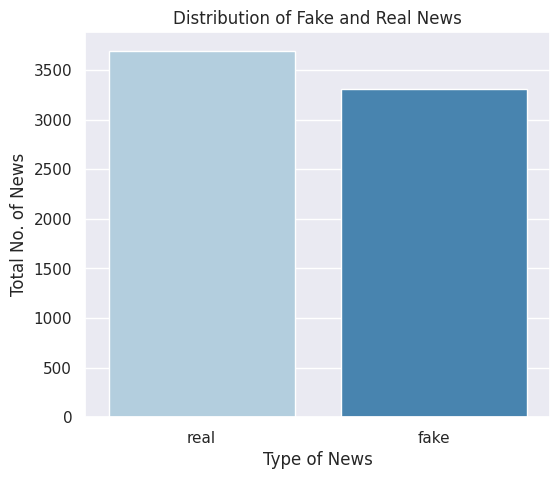

In [ ]:
sns.set(rc={"figure.figsize":(6, 5)})
ax = sns.barplot(x = label_counts.index, y = label_counts.values, data = data, palette = "Blues")
ax.set(title="Distribution of Fake and Real News", xlabel = "Type of News", ylabel = "Total No. of News")

Task7: Use info() function to get all the necessary details of your data. (Marks:1)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        6994 non-null   object
 1   word_label  7000 non-null   object
dtypes: object(2)
memory usage: 109.5+ KB


Task 8: You must have noticed that there are null values in the dataset. So write a code to see how many total null values we have in the 'text' column. Hint: use the isnull() and sum() functions for this.

Marks: 1

In [ ]:
data['text'].isnull().sum()

6

Task 9: Unless we fill in the null values, we will get errors later when we tokenized it. So us fillna() function and fill it with 'No info'.
(Marks: 2)

In [ ]:
data['text'].fillna("No Info", inplace = True)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7000 entries, 0 to 6999
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   text        7000 non-null   object
 1   word_label  7000 non-null   object
dtypes: object(2)
memory usage: 109.5+ KB


Task 10: Lets turn the text column to string by using astype(str) function. (Marks: 2)

In [ ]:
data['text'] = data['text'].astype(str)

In [ ]:
data['text']

0       No comment is expected from Barack Obama Membe...
1          Did they post their votes for Hillary already?
2        Now, most of the demonstrators gathered last ...
3       A dozen politically active pastors came here f...
4       The RS-28 Sarmat missile, dubbed Satan 2, will...
                              ...                        
6995    RAMALLAH, West Bank (Reuters) - Palestinian Pr...
6996    Donald J. Trump on Wednesday offered a defiant...
6997                                              No Info
6998                                                     
6999     US Will Never Separate its Fighters from Isl...
Name: text, Length: 7000, dtype: object


---

Text preprocessing with Natural Language Processing.

---
---

Task 11: Apply word_tokenize to tokenize the sentences into words. (Marks: 2)

In [ ]:
import nltk
nltk.download('punkt')
data['text'] = data['text'].apply(word_tokenize)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
data['text']

0       [No, comment, is, expected, from, Barack, Obam...
1       [Did, they, post, their, votes, for, Hillary, ...
2       [Now, ,, most, of, the, demonstrators, gathere...
3       [A, dozen, politically, active, pastors, came,...
4       [The, RS-28, Sarmat, missile, ,, dubbed, Satan...
                              ...                        
6995    [RAMALLAH, ,, West, Bank, (, Reuters, ), -, Pa...
6996    [Donald, J., Trump, on, Wednesday, offered, a,...
6997                                           [No, Info]
6998                                                   []
6999    [US, Will, Never, Separate, its, Fighters, fro...
Name: text, Length: 7000, dtype: object

Task 12: Apply isalpha() to remove punctuations and symbols. (Marks: 2)

In [ ]:
data['text'] = data['text'].apply(lambda x: [item for item in x if item.isalpha()])

In [ ]:
data['text']

0       [No, comment, is, expected, from, Barack, Obam...
1       [Did, they, post, their, votes, for, Hillary, ...
2       [Now, most, of, the, demonstrators, gathered, ...
3       [A, dozen, politically, active, pastors, came,...
4       [The, Sarmat, missile, dubbed, Satan, will, re...
                              ...                        
6995    [RAMALLAH, West, Bank, Reuters, Palestinian, P...
6996    [Donald, Trump, on, Wednesday, offered, a, def...
6997                                           [No, Info]
6998                                                   []
6999    [US, Will, Never, Separate, its, Fighters, fro...
Name: text, Length: 7000, dtype: object

Task 13: Apply islower() to turn all the sentences to lowercase. (Marks: 2)

In [ ]:
data['text'] = data['text'].apply(lambda x: [item.lower() for item in x])

In [ ]:
data['text']

0       [no, comment, is, expected, from, barack, obam...
1       [did, they, post, their, votes, for, hillary, ...
2       [now, most, of, the, demonstrators, gathered, ...
3       [a, dozen, politically, active, pastors, came,...
4       [the, sarmat, missile, dubbed, satan, will, re...
                              ...                        
6995    [ramallah, west, bank, reuters, palestinian, p...
6996    [donald, trump, on, wednesday, offered, a, def...
6997                                           [no, info]
6998                                                   []
6999    [us, will, never, separate, its, fighters, fro...
Name: text, Length: 7000, dtype: object

Task 14: Apply stopwords to remove all the filler words.
(Marks: 2)

In [ ]:
nltk.download('stopwords')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))

data['text'] = data['text'].apply(lambda x: [item for item in x if item not in stop_words])

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
data['text']

0       [comment, expected, barack, obama, members, fu...
1                         [post, votes, hillary, already]
2       [demonstrators, gathered, last, night, exercis...
3       [dozen, politically, active, pastors, came, pr...
4       [sarmat, missile, dubbed, satan, replace, flie...
                              ...                        
6995    [ramallah, west, bank, reuters, palestinian, p...
6996    [donald, trump, wednesday, offered, defiant, d...
6997                                               [info]
6998                                                   []
6999    [us, never, separate, fighters, depends, dan, ...
Name: text, Length: 7000, dtype: object

Task 15: Apply lemmatizer to get the base word. Use this as reference to apply lemmatizing: https://www.holisticseo.digital/python-seo/nltk/lemmatize
(Marks: 2)

In [ ]:
nltk.download('wordnet')
from nltk.stem import WordNetLemmatizer
from nltk.corpus import wordnet

lem = WordNetLemmatizer()

data['text'] = data['text'].apply(lambda x: [lem.lemmatize(item, wordnet.VERB) for item in x])

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [ ]:
data['text']

0       [comment, expect, barack, obama, members, fuky...
1                          [post, vote, hillary, already]
2       [demonstrators, gather, last, night, exercise,...
3       [dozen, politically, active, pastors, come, pr...
4       [sarmat, missile, dub, satan, replace, fly, mi...
                              ...                        
6995    [ramallah, west, bank, reuters, palestinian, p...
6996    [donald, trump, wednesday, offer, defiant, def...
6997                                               [info]
6998                                                   []
6999    [us, never, separate, fighters, depend, dan, g...
Name: text, Length: 7000, dtype: object

---

Task 16:
Apply PorterStemmer() to your 'text' column
(Marks:2)

In [ ]:
from nltk.stem import PorterStemmer
ps = PorterStemmer()

data['text'] = data['text'].apply(lambda x: [ps.stem(item) for item in x])

In [ ]:
data['text']

0       [comment, expect, barack, obama, member, fukyo...
1                          [post, vote, hillari, alreadi]
2       [demonstr, gather, last, night, exercis, const...
3       [dozen, polit, activ, pastor, come, privat, di...
4       [sarmat, missil, dub, satan, replac, fli, mile...
                              ...                        
6995    [ramallah, west, bank, reuter, palestinian, pr...
6996    [donald, trump, wednesday, offer, defiant, def...
6997                                               [info]
6998                                                   []
6999    [us, never, separ, fighter, depend, dan, glaze...
Name: text, Length: 7000, dtype: object

Task 17: Join the 'text' column to get the full propocessed form. For simplicity, I am giving you part of the code:  **.apply(lambda x: " ".join(x))** (Marks:1)

In [ ]:
data['text'] = data['text'].apply(lambda x: " ".join(x))

Task 18: Split the 'text' column data for training. Use the first 5000 rows for training. (Marks:1)


In [ ]:
train_text = data['text'][:5600]

Task 19: Split the 'text' column data for testing. Use the remaining rows for training. Hint: df.text[5000:]
(Marks:1)

In [ ]:
test_text = data['text'][5600:]

Task 20:
Now let us do the same for the 'word_label' column. Split it into training and testing. First 5000 rows for training and remaining for testing. (Marks:2)

In [ ]:
train_label = data['word_label'][:5600]

In [ ]:
test_label = data['word_label'][5600:]

Task 21: Initiatize CountVectorizer() (Marks:2)



In [ ]:
cv = CountVectorizer(min_df=0, max_df=1, binary = False, ngram_range = (1,3))

Task 22: Fit transform the training text. (Marks:1)

In [ ]:
cv_train_text = cv.fit_transform(train_text)

Task 23: Transform the test  text. (Marks:1)

In [ ]:
cv_test_text = cv.transform(test_text)

Task 24: Initialize the LabelBinarizer() (Marks:1)

In [ ]:
lb = LabelBinarizer()

Task 25: Fit transform the training labels. (Marks:1)

In [ ]:
lb_train_label = lb.fit_transform(train_label)

Task 26: Fit transform the testing labels. (Marks:1)

In [ ]:
lb_test_binary = lb.fit_transform(test_label)

Task 27:
- Initialize the Multinomial Naive Bayes Model
- Fit the data to the model
-  Predict the labels
- find the Accuracy

Marks:4

In [ ]:
mnb = MultinomialNB()

In [ ]:
mnb_bow = mnb.fit(cv_train_text, lb_train_label)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
mnb_bow_predict = mnb.predict(cv_test_text)

In [ ]:
mnb_bow_score = accuracy_score(lb_test_binary, mnb_bow_predict)
print("Accuracy :", mnb_bow_score)

Accuracy : 0.7992857142857143


Task 28: Time to do the same but with a different Machine Learning Model (Support Vector Machine). Use this as reference for learning about SVMs: https://www.geeksforgeeks.org/support-vector-machine-algorithm/

- Initialize the Support Vector Machine Model
- Fit the data to the model
-  Predict the labels
- find the Accuracy

Marks:4

In [ ]:
from sklearn.svm import SVC

In [ ]:
svm = SVC(kernel="rbf", gamma=0.5, C=1.0)

In [ ]:
svm_bow = svm.fit(cv_train_text, lb_train_label)

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [ ]:
svm_bow_predict = svm.predict(cv_test_text)

In [ ]:
svm_bow_score = accuracy_score(lb_test_binary, svm_bow_predict)
print("Accuracy :", svm_bow_score)

Accuracy : 0.5385714285714286


Task 29: Apply WordCloud to get a visual representation of the most used words from 'real' news. Marks:2

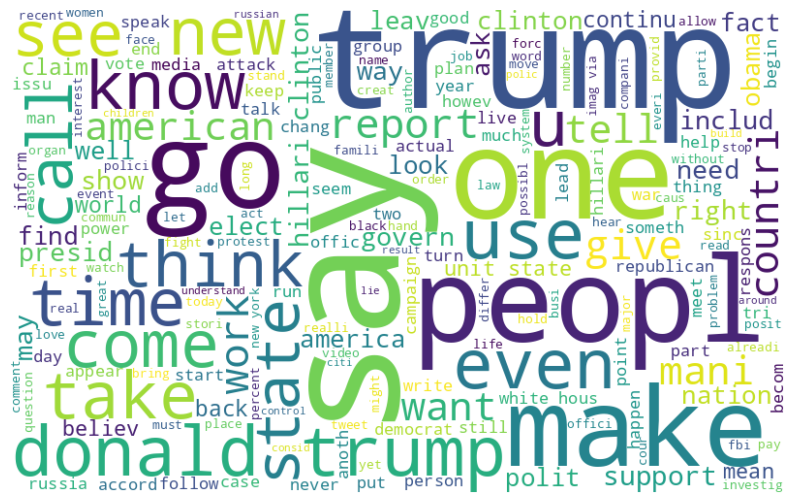

In [ ]:
from wordcloud import WordCloud, STOPWORDS
%matplotlib inline

real_words = ' '.join(list(data[data['word_label'] == 'real']['text']))

wordcloud = WordCloud(width=800, height=500, background_color='white', random_state=20, max_font_size=170, contour_color='black', contour_width=1).generate(real_words)

plt.figure(figsize=(10, 7))
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis('off')
plt.show()